# Generate Fig 4

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import positive
from os.path import expanduser
import pickle
import numpy as np
from scipy.io import loadmat
import matplotlib as mpl
import matplotlib.pyplot as plt

(positive)>> Applying custom matplotlib settings.


## Load data

In [3]:
try:
    with open('./ysmodels.pickle','rb') as f:
        ysfits = pickle.load(f)
except ImportError:
    with open('./ysmodels-dill-0.2.9.pickle','rb') as f:
        ysfits = pickle.load(f)

## FIG. 4 (Top Left)

/Users/book/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1154: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  np.any(self._markeredgecolor != ec):


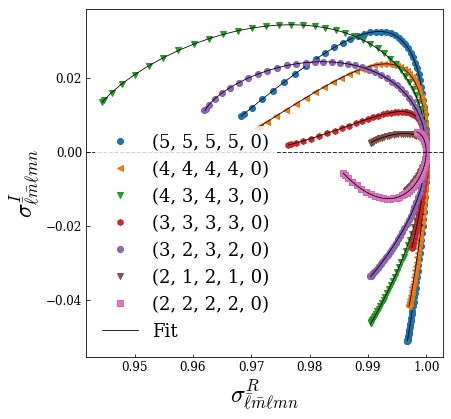

In [4]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize']

z = sorted(ysfits.keys(),key= lambda X: X[0])[::-1]
Q = 81
jf = 0.995*np.cos(np.pi*np.linspace(0,1,Q)) 

fig, ax = plt.subplots( figsize=1.6*plt.figaspect(1) )
mkr = 'o<vs*h>^o<vs*h>p*'

for i,k in enumerate(z):
    y = ysfits[k]
    ll,mm,l,m,n = k
    if (n==0) and (l==ll):
        p = ax.plot( y.scalar_range.real,y.scalar_range.imag, ls='none', marker=mkr[i], label=k )
        p[0].set_markeredgecolor(0.9*np.array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255 )
        label = 'Fit' if k is z[-1] else None
        ax.plot(y.eval(y.domain).real, y.eval(y.domain).imag, color='k', label=label )

ax.set_xlabel(r'$\sigma^{R}_{ \bar{\ell} \bar{m} \ell m n}$')
ax.set_ylabel(r'$\sigma^{I}_{ \bar{\ell} \bar{m} \ell m n}$')
ax.tick_params(direction='in')
ax.axhline(0,color='k',ls='--')
ax.legend(frameon=True,edgecolor='none')

fig.savefig('./fig4-top-left.pdf', pad_inches=0.05, bbox_inches='tight')
fig.savefig('./../issue2_ysprod_1.pdf', pad_inches=0.05, bbox_inches='tight')
plt.show()
plt.close(fig)

## FIG. 4 (Top Right)

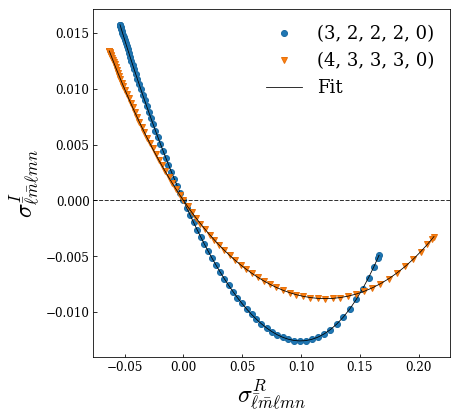

In [5]:
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize']

z = [(3, 2, 2, 2, 0), (4, 3, 3, 3, 0)]
Q = 81
jf = 0.995*np.cos(np.pi*np.linspace(0,1,Q)) 

fig, ax = plt.subplots( figsize=1.6*plt.figaspect(1) )
mkr = 'ovs*h>^o<vs*h>p*'

for i,k in enumerate(z):
    y = ysfits[k]
    ll,mm,l,m,n = k
    if k:
        p = ax.plot( y.scalar_range.real,y.scalar_range.imag, ls='none', marker=mkr[i], label=k )
        p[0].set_markeredgecolor(0.9*np.array([int(p[0].get_color().lstrip('#')[i:i+2], 16) for i in (0, 2 ,4)])/255 )
        label = 'Fit' if k is z[-1] else None
        ax.plot(y.eval(y.domain).real, y.eval(y.domain).imag, color='k', label=label )

ax.set_xlabel(r'$\sigma^{R}_{ \bar{\ell} \bar{m} \ell m n}$')
ax.set_ylabel(r'$\sigma^{I}_{ \bar{\ell} \bar{m} \ell m n}$')
ax.tick_params(direction='in')
ax.axhline(0,color='k',ls='--')
ax.legend(frameon=True,edgecolor='none')

fig.savefig('./fig4-top-right.pdf', pad_inches=0.05, bbox_inches='tight')
fig.savefig('./../issue2_ysprod_2.pdf', pad_inches=0.05, bbox_inches='tight')
plt.show()
plt.close(fig)

## FIG. 4 (Bottom Left)

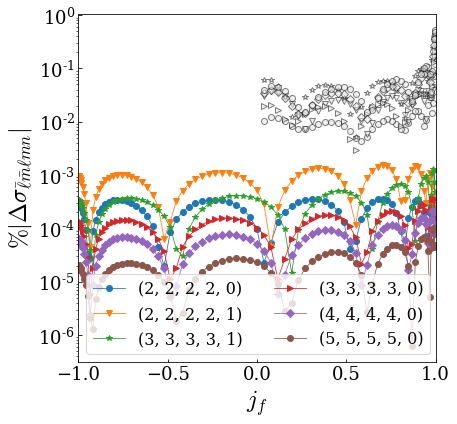

In [12]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

z = sorted(ysfits.keys(),key= lambda X: X[0])
Q = 81
jf = 0.995*np.cos(np.pi*np.linspace(0,1,Q)) 

fig, ax = plt.subplots(figsize=1.6*plt.figaspect(1))
mkr = 'o<vs*h>^pXDo<vs*h>p*'

__y = {}
__res = {}

for i,k in enumerate(z):
    ll,mm,l,m,n = k
    if ll==mm:
        # Get fit residual from London
        y = ysfits[k]
        res = 100*np.abs(y.scalar_range-y.eval(y.domain))/np.abs(np.mean(y.scalar_range))
        
        # Get fit residual from Berti and Klein
        y_fit = positive.ysprod14081860(jf, ll,mm, (l, m, n)).T[0]
        res2 = 100*np.abs(y.scalar_range-y_fit)/np.abs(np.mean(y.scalar_range))
        
        # Plot residuals
        p = ax.plot(jf, res, ls='-', marker=mkr[i], label=k)
        mask = jf > 0.005
        p2 = ax.plot(jf[mask], res2[mask], ls='-', marker=mkr[i], label=None, color=0.9*np.ones(3), alpha = 0.5, mec='k' )

ax.tick_params(direction='in')
ax.axhline(0,color='k',ls='--')
ax.set_xlim( [-1,1] )
# ax.set_ylim( [1e-7,1e-1] )
ax.set_xlabel(r'$j_f$')
ax.set_ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
ax.legend(ncol=2,fontsize=16,frameon=True)
ax.set_yscale('log')

fig.savefig('./fig4-bottom-left.pdf', pad_inches=0.05, bbox_inches='tight')
fig.savefig('./../issue2_ysprod_3v2.pdf', pad_inches=0.05, bbox_inches='tight')
plt.show()
plt.close(fig)

## FIG. 4 (Bottom Right)

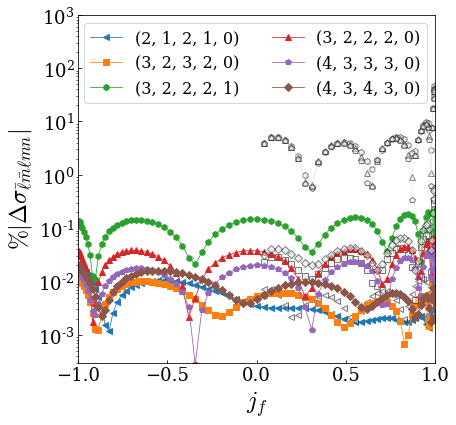

In [7]:
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

z = sorted(ysfits.keys(),key= lambda X: X[0])
Q = 81
jf = 0.995*np.cos(np.pi*np.linspace(0,1,Q)) 

fig, ax = plt.subplots(figsize=1.6*plt.figaspect(1))
mkr = 'o<vs*h>^pDXo<vs*h>p*'

__y = {}
__res = {}

for i,k in enumerate(z):
    ll,mm,l,m,n = k
    if ll!=mm:
        # Get fit residual from London
        y = ysfits[k]
        res = 100*np.abs(y.scalar_range-y.eval(y.domain))/np.abs(np.mean(y.scalar_range))
        
        # Get fit residual from Berti and Klein
        y_fit = -positive.ysprod14081860(jf, ll, mm, (l,m,n)).T[0]
        if np.mod(l+m,2):
            y_fit = -y_fit
        res2 = 100*np.abs(y.scalar_range-y_fit)/np.abs(np.mean(y.scalar_range))
        
        # Plot residuals
        ax.plot(jf, res, ls='-', marker=mkr[i], label=k )
        mask = jf > 0.005
        ax.plot(jf[mask], res2[mask], ls='-', marker=mkr[i], label=None, color=0.9*np.ones(3), alpha = 0.5, mec='k' )

    
ax.tick_params(direction='in')
ax.axhline(0,color='k',ls='--')
ax.set_xlim( [-1,1] )
ax.set_ylim( [3e-4,1e3] )
ax.set_xlabel(r'$j_f$')
ax.set_ylabel(r'$\%|\Delta\sigma_{ \bar{\ell} \bar{m} \ell m n}|$')
ax.legend(ncol=2,fontsize=16,frameon=True)
ax.set_yscale('log')

fig.savefig('./fig4-bottom-right.pdf', pad_inches=0.05, bbox_inches='tight')
fig.savefig('./../issue2_ysprod_4v2.pdf', pad_inches=0.05, bbox_inches='tight')
plt.show()
plt.close(fig)